In [1]:
#harris
import cv2
import numpy as np

img = cv2.imread('chessboard.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for making the corners, not important
dst = cv2.dilate(dst,None)

#Threshold for an optimal value, it may vary depending on the image
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

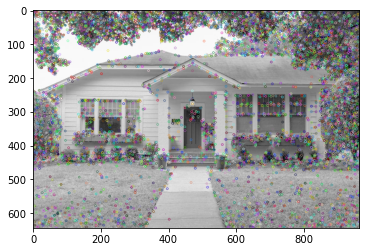

(<matplotlib.image.AxesImage at 0x28558b6fbb0>, None)

In [4]:
#SIFT

img2 = cv2.imread('home.jpeg')
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img3 = cv2.drawKeypoints(gray,kp,img2)
cv2.imwrite('sift_keypoints.jpg',img3)
plt.imshow(img3),plt.show()

In [3]:
#SURF

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('butterfly.jpg',0)
#create SURF object. you can specifi params here or later
#here i set hessian threshold to 400
surf = cv2.xfeatures2d.SURF_create(400)

#find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)
len(kp)

#check present hessian threshold
print(surf.getHessianThreshold())

#we set it to some 50000. remmeber, it is just for representing in picture.
#in actual cases, it is better to have a value 300-500
surf.setHessianThreshold(50000)

#again compute keypoints and check its number.
kp,des = surf.detectAndCompute(img,None)
print(len(kp))

img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 11859


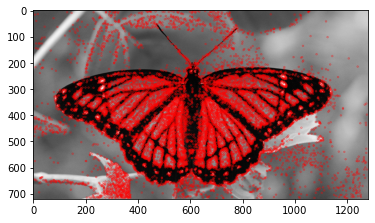

Total Keypoints without nonmaxSuppression: 34578


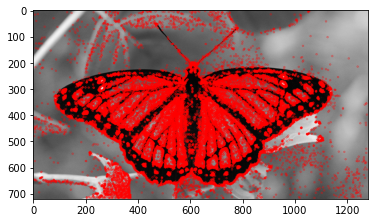

(<matplotlib.image.AxesImage at 0x2855b154400>, None)

In [5]:
#FAST

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('butterfly.jpg',0)

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
plt.imshow(img2), plt.show()

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
plt.imshow(img3), plt.show()

32
(646, 32)


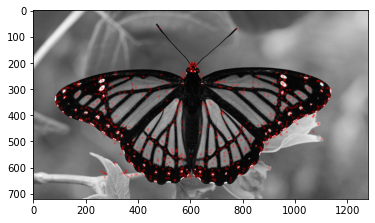

(<matplotlib.image.AxesImage at 0x2855a69c070>, None)

In [6]:
#BRIEF

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('butterfly.jpg',0)
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )

img2 = cv.drawKeypoints(img, kp, None, (255,0,0))
plt.imshow(img2), plt.show()

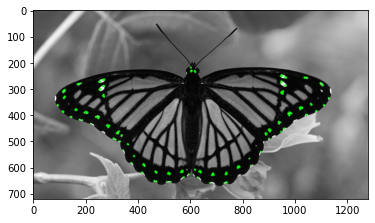

(<matplotlib.image.AxesImage at 0x2855b6e98e0>, None)

In [7]:
#ORB
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('butterfly.jpg',0)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

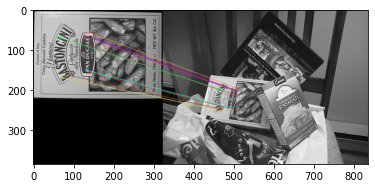

(<matplotlib.image.AxesImage at 0x2855b755d90>, None)

In [8]:
#Brute Force Matching with ORB

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

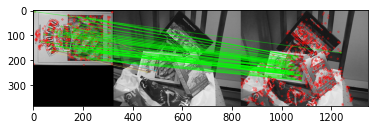

(<matplotlib.image.AxesImage at 0x2855b389a30>, None)

In [10]:
#FLANN

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img5 = cv2.drawMatchesKnn(img3,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img5,),plt.show()